<a href="https://colab.research.google.com/github/Gamearonx/Simple-Multiple-Linear-Regression/blob/main/Visualization_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [140]:
# Ensure plots show in Google Colab
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Columns: ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age', 'outcome']
Dataset shape after cleaning: (392, 7)
Dataset shape after outlier removal: (379, 7)


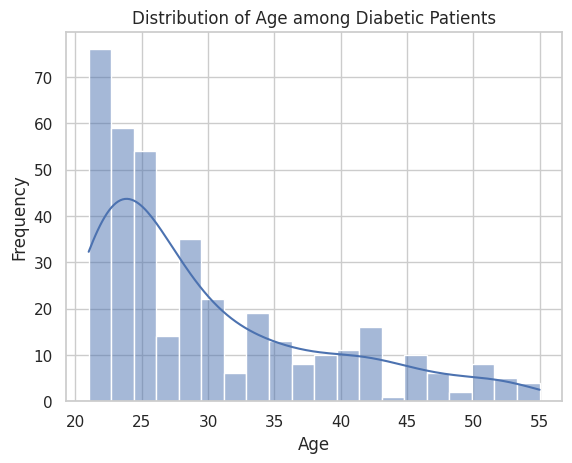

Inference: The age distribution shows the concentration of diabetic patients across different age groups.


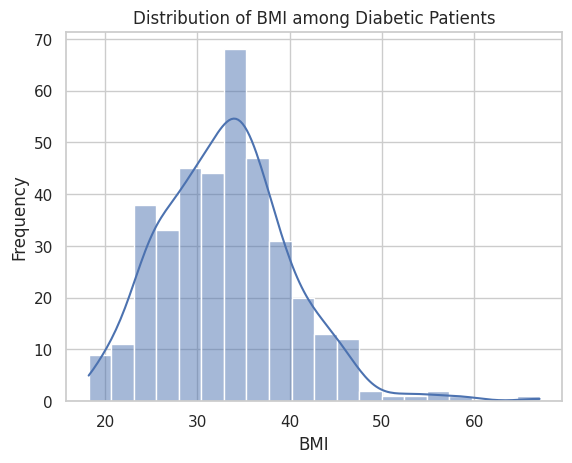

Inference: The BMI distribution helps understand obesity patterns in diabetic patients.


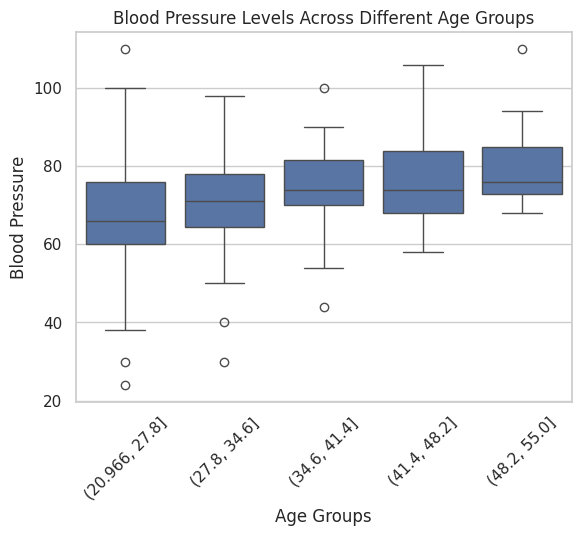

Inference: Blood pressure levels across different age groups indicate hypertension trends among diabetic patients.


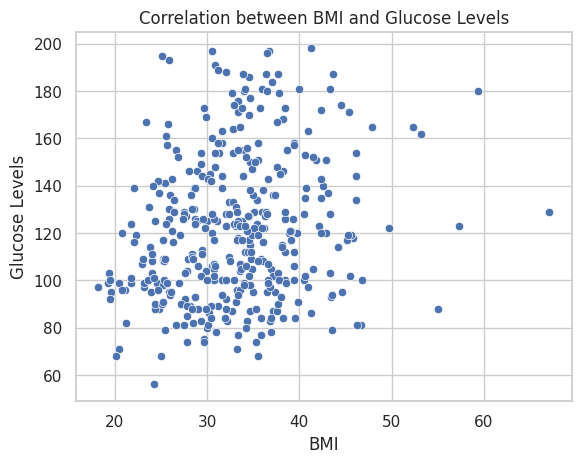

Inference: A positive correlation between BMI and glucose levels suggests that higher BMI may be associated with higher glucose levels.


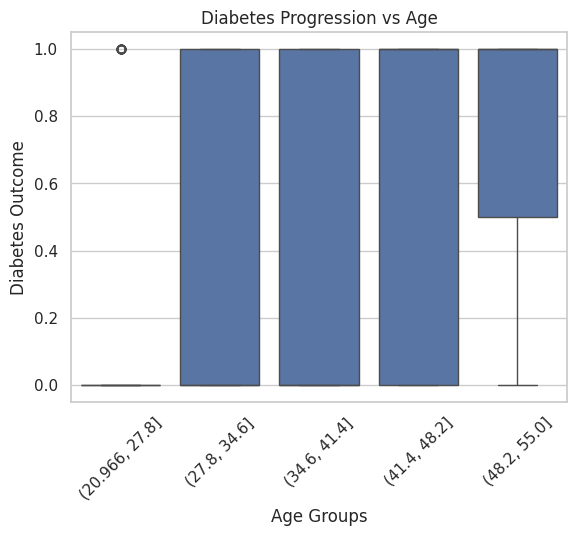

Inference: The boxplot reveals how diabetes progression varies across different age groups.


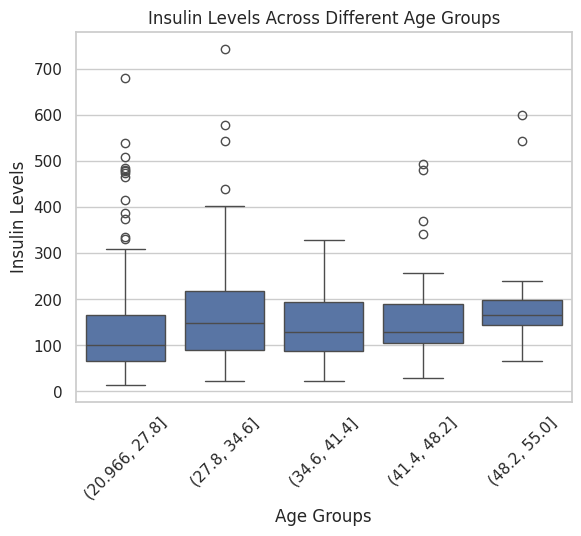

Inference: This visualization helps analyze how insulin levels fluctuate across age groups.


In [150]:
from google.colab import drive
drive.mount('/content/drive')

# Step 1: Load Data
def load_data():
    df = pd.read_csv("/content/drive/My Drive/PRE BOOT CAMP ASSIGNMENT/diabetes.csv")
    return df

# Step 2: Data Cleaning
def clean_data(df):
    df.columns = df.columns.str.strip().str.lower()
    df = df.drop_duplicates()
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
    df = df.dropna()

    # Display actual column names for debugging
    print("Dataset Columns:", df.columns.tolist())

    # Ensure expected columns exist
    expected_cols = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'age', 'outcome']
    df = df[[col for col in expected_cols if col in df.columns]]

    # Replace zero values in specific columns with NaN
    zero_replace_cols = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi']
    for col in zero_replace_cols:
        if col in df.columns:
            df[col] = df[col].replace(0, pd.NA)

    df = df.dropna()  # Drop rows with NaN values

    # Print dataset shape after cleaning
    print("Dataset shape after cleaning:", df.shape)
    return df

# Step 3: Remove Outliers
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=['number']).columns  # Select only numeric columns
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

    # Print dataset shape after outlier removal
    print("Dataset shape after outlier removal:", df.shape)
    return df

# Step 4: Visualizations

def plot_age_bmi_distribution(df):
    """Question: What is the distribution of age and BMI among diabetic patients?"""
    if not df.empty:
        if 'age' in df.columns:
            plt.figure()
            sns.histplot(data=df, x='age', kde=True, bins=20)
            plt.title('Distribution of Age among Diabetic Patients')
            plt.xlabel("Age")
            plt.ylabel("Frequency")
            plt.show()
            print("Inference: The age distribution shows the concentration of diabetic patients across different age groups.")

        if 'bmi' in df.columns:
            plt.figure()
            sns.histplot(data=df, x='bmi', kde=True, bins=20)
            plt.title('Distribution of BMI among Diabetic Patients')
            plt.xlabel("BMI")
            plt.ylabel("Frequency")
            plt.show()
            print("Inference: The BMI distribution helps understand obesity patterns in diabetic patients.")

def plot_blood_pressure_vs_age(df):
    """Question: How do blood pressure levels vary across different age groups?"""
    if not df.empty and 'age' in df.columns and 'bloodpressure' in df.columns:
        plt.figure()
        sns.boxplot(x=pd.cut(df['age'], bins=5), y='bloodpressure', data=df)
        plt.title('Blood Pressure Levels Across Different Age Groups')
        plt.xlabel("Age Groups")
        plt.ylabel("Blood Pressure")
        plt.xticks(rotation=45)
        plt.show()
        print("Inference: Blood pressure levels across different age groups indicate hypertension trends among diabetic patients.")

def plot_bmi_vs_glucose(df):
    """Question: Is there a correlation between BMI and Glucose levels?"""
    if not df.empty and 'bmi' in df.columns and 'glucose' in df.columns:
        plt.figure()
        sns.scatterplot(x='bmi', y='glucose', data=df)
        plt.title('Correlation between BMI and Glucose Levels')
        plt.xlabel("BMI")
        plt.ylabel("Glucose Levels")
        plt.show()
        print("Inference: A positive correlation between BMI and glucose levels suggests that higher BMI may be associated with higher glucose levels.")

def plot_age_vs_diabetes_progression(df):
    """Question: Are there any observable patterns in the relationship between diabetes progression and patient age?"""
    if not df.empty and 'age' in df.columns and 'outcome' in df.columns:
        plt.figure()
        sns.boxplot(x=pd.cut(df['age'], bins=5), y='outcome', data=df)
        plt.title('Diabetes Progression vs Age')
        plt.xlabel("Age Groups")
        plt.ylabel("Diabetes Outcome")
        plt.xticks(rotation=45)
        plt.show()
        print("Inference: The boxplot reveals how diabetes progression varies across different age groups.")

def plot_insulin_vs_age(df):
    """Question: How do insulin levels vary across different age groups?"""
    if not df.empty and 'age' in df.columns and 'insulin' in df.columns:
        plt.figure()
        sns.boxplot(x=pd.cut(df['age'], bins=5), y='insulin', data=df)
        plt.title('Insulin Levels Across Different Age Groups')
        plt.xlabel("Age Groups")
        plt.ylabel("Insulin Levels")
        plt.xticks(rotation=45)
        plt.show()
        print("Inference: This visualization helps analyze how insulin levels fluctuate across age groups.")

def visualize_data(df):
    sns.set(style='whitegrid')
    plot_age_bmi_distribution(df)
    plot_blood_pressure_vs_age(df)
    plot_bmi_vs_glucose(df)
    plot_age_vs_diabetes_progression(df)
    plot_insulin_vs_age(df)

# Step 5: Execute EDA
def eda_diabetes():
    df = load_data()
    df = clean_data(df)
    df = remove_outliers(df)
    if df.empty:
        print()
    else:
        visualize_data(df)
    return df

# Run EDA
df_cleaned = eda_diabetes()
